In [19]:
import pandas as pd
import numpy as np
import numpy.random as alea
import seaborn as sns
from collections import Counter

In [5]:
articles_df = pd.read_csv('./datasets/medium_articles.csv')
articles_df.head(5)

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [6]:
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      192363 non-null  object
 1   text       192368 non-null  object
 2   url        192368 non-null  object
 3   authors    192368 non-null  object
 4   timestamp  192366 non-null  object
 5   tags       192368 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


In [7]:
articles_df = articles_df.dropna()

In [8]:
articles_df.shape[0]

192361

In [14]:
articles_df["tags"]

0         ['Mental Health', 'Health', 'Psychology', 'Sci...
1         ['Mental Health', 'Coronavirus', 'Science', 'P...
2         ['Biotechnology', 'Neuroscience', 'Brain', 'We...
3         ['Health', 'Neuroscience', 'Mental Health', 'P...
4         ['Brain', 'Health', 'Development', 'Psychology...
                                ...                        
192363    ['Cleaning', 'Cleaning Services', 'Cleaning Co...
192364                  ['Bedding', 'Cleaning', 'Maintain']
192365    ['Cleaning', 'End Of Lease Cleaning', 'Cleaners']
192366    ['Romania', 'Language Learning', 'Storyofmylife']
192367    ['Hong Kong', 'Cantonese', 'Language Learning'...
Name: tags, Length: 192361, dtype: object

In [46]:
all_tags = [tag for tags_list in articles_df["tags"] for tag in eval(tags_list)]
d_tags_counter = Counter(all_tags)

tags, freqs = list(zip(*d_tags_counter.most_common()))
print(len(tags))
print(freqs[2000]) # The first 2000 tags appear at least 45 times

78636
45


In [48]:
min_freq = 30
found = False
i = 0
while not(found):
    if freqs[i] < min_freq:
        found = True
    else:
        i+=1
print(i)
tags = tags[:i]
freqs = freqs[:i]

2776


In [9]:
from gensim import corpora, models, similarities
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import download
download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\llapi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
#Concatenating the articles titles and bodies
articles_content = (articles_df['title'] + ' ' + articles_df['body']).tolist()

In [11]:
#Loading a set of English stopwords
english_stopset_1 = set(stopwords.words('english')).union(
                  {"things", "that's", "there's", "something", "take", "don't", "don", "may", 
                   "set", "might", "says", "including", "lot", "much", "said", "know", "want",
                   "good", "step", "often", "going", "thing", "things", "think", "you're",
                   "back", "actually", "better", "look", "find", "right", "example", 
                   "verb", "verbs", "even", "could", "can", "get", "show", "new",
                   "get", "first", "two", "really", "way", "say", "percent", "many",
                   "see", "use", "word", "words", "us", "make", "need", "never", "love",
                   "see", "life", "go", "day", "play", "group", "former","according", "year",
                   "feel", "family", "thought", "story", "kind", "great", "felt",
                   "games", "city", "cities", "body", "night", "light", "girl", "friend",
                   "real", "person", "people", "big", "long"})

In [12]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
# Importing a larger list of stopwords
with open("./eng_stopwords.txt", "r") as f:
    eng_stopwords = f.readlines()
    #print(eng_stopwords)

for i in range(len(eng_stopwords)):
    eng_stopwords[i] = eng_stopwords[i][:-1]

english_stopset_2 = set(eng_stopwords).union(english_stopset_1)
print(english_stopset_2)

{'elsewhere', 'zero', 'you', 'gave', 'mill', 'where', 'pp', 'actually', 'neither', 'mostly', 'obviously', "haven't", 'somewhat', 'will', 'find', 'each', 'getting', "that's", 'auth', 'seriously', 'group', 'thanks', 'keys', 'normally', 'shall', 'them', 'too', 'saw', 'year', 'nothing', 'ignored', 'next', 's', 'immediately', 'who', 'quite', 'fairly', 'inward', 'herse', 'people', 'less', 'com', 'lot', 'again', 'other', 'six', 'thing', 'hereafter', "'ve", 'whos', 'whim', 'primarily', 'also', 've', 'doing', 'serious', 'step', 'anything', 'this', 'among', 'upon', 'saying', 'twelve', 'whenever', 'respectively', 'affects', 'significantly', 'neverf', 'did', 'by', "doesn't", 'sub', 'won', 'concerning', 'haven', 'eighty', 'day', 'changes', 'meanwhile', 'nos', 'reasonably', 'best', 'sometime', 'things', 'gives', 'approximately', 'information', 'never', 'affected', 'proud', 'q', "i'd", 'u', "that've", 'forth', "weren't", 'promptly', 'related', 'slightly', 'contains', 'whatever', 'particular', "i've",

In [14]:
#Tokenizing words of articles
tokenizer = RegexpTokenizer(r"(?u)[\b\#a-zA-Z][\w&-_]+\b")
articles_tokens = list(map(lambda d: [token for token in tokenizer.tokenize(d.lower()) if token not in english_stopset_2], articles_content))

In [15]:
#Processing bigrams from unigrams (sets of two works frequently together in the corpus)
bigram_transformer = models.Phrases(articles_tokens)
articles_unigrams_bigrams_tokens = list(bigram_transformer[articles_tokens])

In [16]:
#### Eventually use pattern librairy

#Creating a dictionary and filtering out too rare and too common tokens
english_dictionary = corpora.Dictionary(articles_unigrams_bigrams_tokens)
english_dictionary.filter_extremes(no_below=5, no_above=0.2, keep_n=None)
english_dictionary.compactify()
print(english_dictionary.most_common(100))

[('women', 5455), ('trump', 4857), ('students', 3141), ('company', 3013), ('school', 2683), ('u.s', 2435), ('children', 2076), ('president', 2041), ('country', 2002), ('art', 1980), ('public', 1870), ('american', 1853), ('support', 1821), ('place', 1808), ('education', 1781), ('change', 1747), ('schools', 1728), ('woman', 1713), ('times', 1683), ('men', 1667), ('man', 1644), ('today', 1625), ('facebook', 1605), ('case', 1584), ('york', 1581), ('wrote', 1557), ('statement', 1548), ('making', 1528), ('power', 1514), ('asked', 1506), ('report', 1498), ('america', 1459), ('book', 1422), ('news', 1422), ('working', 1409), ('team', 1406), ('fact', 1399), ('history', 1373), ('community', 1372), ('white', 1336), ('experience', 1325), ('future', 1321), ('money', 1317), ('left', 1303), ('read', 1293), ('live', 1290), ('days', 1285), ('united', 1279), ('teachers', 1275), ('political', 1273), ('business', 1271), ('national', 1270), ('point', 1263), ('video', 1254), ('program', 1251), ('data', 1251

In [17]:
#Processing Bag-of-Words (BoW) for each article
articles_bow = [english_dictionary.doc2bow(doc) for doc in articles_unigrams_bigrams_tokens]

In [18]:
#Training the LDA topic model on English articles
lda_model = models.LdaModel(articles_bow, id2word=english_dictionary, num_topics=24, passes=15, iterations=1500)

In [19]:
#Processing the topics for each article
articles_lda = lda_model[articles_bow]

In [20]:
print(articles_lda)

In [21]:
def get_topics_top_words(model, max_words):
    all_topics = model.show_topics(-1, max_words*2, False, False)
    topics = []
    for topic in all_topics:    
        min_score_word = float(abs(topic[1][0][1])) / 10.
        top_positive_words = list(map(lambda y: y[0].replace('_',' '), filter(lambda x: x[1] > min_score_word, topic[1])))[0:max_words]
        topics.append('[' + ', '.join(top_positive_words) + ']')
    return topics

#Computing the main topic of each article
topics_top_words = get_topics_top_words(lda_model, 7)

In [22]:
def get_main_topics(corpus_lda, topics_labels):
    min_strength = (1.0 / float(len(topics_labels)))/10 + 0.01
    main_topics = map(lambda ts: sorted(ts, key=lambda t: -t[1])[0][0] if sorted(ts, key=lambda t: -t[1])[0][1] > min_strength else None, corpus_lda)
    second_topics = map(lambda ts: sorted(ts, key=lambda t: -t[1])[1][0] if len(sorted(ts, key=lambda t: -t[1])) > 1 else None, corpus_lda)
    main_topics_labels = map(lambda x: topics_labels[x] if x != None else '', main_topics)
    second_topics_labels = map(lambda x: topics_labels[x] if x != None else '', second_topics)
    return list(main_topics_labels), list(second_topics_labels)

#Return the discovered topics, sorted by popularity
corpus_main_topics, corpus_second_topics = get_main_topics(articles_lda, topics_top_words)

main_topics_df = pd.DataFrame(corpus_main_topics, columns=['topic']).groupby('topic').size().sort_values(ascending=True).reset_index()
main_topics_df.columns = ['topic','count']
main_topics_df.sort_values('count', ascending=False)

,topic,count
23,"[film, season, movie, man, fans, watch, wanted]",1056
22,"[art, artists, experience, artist, place, book...",798
21,"[trump, president, white house, president dona...",556
20,"[god, human, scientists, water, earth, jesus, ...",535
19,"[data, company, pay, amazon, money, services, ...",453
18,"[children, education, schools, support, commun...",431
17,"[women, men, woman, church, sexual harassment]",422
16,"[facebook, company, apple, case, users, statem...",394
15,"[police, shooting, texas, killed, law enforcem...",393
14,"[country, u.s, america, political, campaign, v...",376


In [23]:
print(len(topics_top_words))

for t in topics_top_words:
    print(t)

24
[god, human, scientists, water, earth, jesus, science]
[las vegas, davis, johnson, police, charlottesville, saturday, espn]
[police, shooting, texas, killed, law enforcement, death, gun]
[women, men, woman, church, sexual harassment]
[art, artists, experience, artist, place, book, sense]
[video, post shared, pokemon, instagram, post, wrote, domestic violence]
[country, u.s, america, political, campaign, vote, muslim]
[trump, president, white house, president donald, donald trump, election]
[uber, black, protest, white, nfl, drivers, protests]
[giuliani, times, asked, smith, israel, investigation, savage]
[apple's, sleep, dogs, dog, animals, mccain, cia]
[game, event, photos, snapchat, york, photo, video]
[children, education, schools, support, community, kids, parents]
[facebook, company, apple, case, users, statement, government]
[cosby, trial, graham, jury, reilly, prosecutors, judge]
[team, business, energy, change, company, future, leaders]
[nassar, athletes, team, msu, usa gymn

In [24]:
cmt1 = corpus_main_topics[1]
cst1 = corpus_second_topics[1]
print(cmt1)
print(cst1)
i_cmt1 = topics_top_words.index(cmt1)
print(i_cmt1)
i_cst1 = topics_top_words.index(cst1)
print(i_cst1)
print(articles_lda[1])

[film, season, movie, man, fans, watch, wanted]
[nassar, athletes, team, msu, usa gymnastics, olympic, music]
17
16
[(6, 0.09932352), (16, 0.29010832), (17, 0.5212079), (19, 0.08277983)]


In [25]:
n = alea.randint(articles_df.shape[0])
#n = 1
article = articles_df.iloc[n]
print(article['category'])
print(article['title'])
print(article['body'][:500])
print()

main_topics = corpus_main_topics[n]
second_topics = corpus_second_topics[n]
print("topic group " + str(topics_top_words.index(corpus_main_topics[n])))
print(main_topics)
print("topic group " + str(topics_top_words.index(corpus_second_topics[n])))
print(second_topics)
print("scores :")
print(sorted(articles_lda[n], key=lambda t: -t[1]))

SCIENCE
Actual Scientists Found That Ayahuasca Can Help You Think More Creatively
Ayahuasca, a hallucinogenic brew from the Amazon consumed in religious ceremonies for centuries, has been gaining popularity in Europe and North America as a mind-altering trick to condense years of psychotherapy into a psychedelic trip just a few hours long. Drinking the plant brew, users report, helps gain psychological insight and produce new ideas, among other things.  To those users, it’s not exactly news that a psychedelic can enhance creativity. But in recent years, science has been catch

topic group 4
[art, artists, experience, artist, place, book, sense]
topic group 0
[god, human, scientists, water, earth, jesus, science]
scores :
[(4, 0.3679793), (0, 0.18738489), (18, 0.17072384), (15, 0.12203267), (9, 0.07216805), (20, 0.03809133), (11, 0.020553797), (5, 0.0101013025)]


In [26]:
categories = articles_df["category"].unique()
for i in range(len(categories)):
    print(str(i) + ' ' + categories[i])

0 ARTS & CULTURE
1 BUSINESS
2 COMEDY
3 CRIME
4 EDUCATION
5 ENTERTAINMENT
6 ENVIRONMENT
7 MEDIA
8 POLITICS
9 RELIGION
10 SCIENCE
11 SPORTS
12 TECH
13 WOMEN


In [27]:
CategoryLinks = [12, 9, 3, 4, 6, 5, 13, 2, 8, 3, 8, 4, 7, 1, 8, 11, 0, 5, 2, 8, 0, 9, 3, 13]

In [28]:
for i in range(len(topics_top_words)):
    print(str(i) + ' ' + topics_top_words[i])

0 [god, human, scientists, water, earth, jesus, science]
1 [las vegas, davis, johnson, police, charlottesville, saturday, espn]
2 [police, shooting, texas, killed, law enforcement, death, gun]
3 [women, men, woman, church, sexual harassment]
4 [art, artists, experience, artist, place, book, sense]
5 [video, post shared, pokemon, instagram, post, wrote, domestic violence]
6 [country, u.s, america, political, campaign, vote, muslim]
7 [trump, president, white house, president donald, donald trump, election]
8 [uber, black, protest, white, nfl, drivers, protests]
9 [giuliani, times, asked, smith, israel, investigation, savage]
10 [apple's, sleep, dogs, dog, animals, mccain, cia]
11 [game, event, photos, snapchat, york, photo, video]
12 [children, education, schools, support, community, kids, parents]
13 [facebook, company, apple, case, users, statement, government]
14 [cosby, trial, graham, jury, reilly, prosecutors, judge]
15 [team, business, energy, change, company, future, leaders]
16 

In [29]:
corpus_lda_category_index = [topics_top_words.index(topic) for topic in corpus_main_topics]
corpus_lda_category_topics = [str(topic) for topic in corpus_main_topics]

corpus_converted_category = [categories[CategoryLinks[i]] for i in corpus_lda_category_index]
print(len(corpus_converted_category))
print(corpus_converted_category[:100])

6872
['ENTERTAINMENT', 'ENTERTAINMENT', 'COMEDY', 'ENTERTAINMENT', 'ENVIRONMENT', 'ENTERTAINMENT', 'ENTERTAINMENT', 'WOMEN', 'RELIGION', 'ENTERTAINMENT', 'ENTERTAINMENT', 'ENTERTAINMENT', 'COMEDY', 'ENVIRONMENT', 'ENTERTAINMENT', 'ENVIRONMENT', 'POLITICS', 'ENTERTAINMENT', 'MEDIA', 'POLITICS', 'ENTERTAINMENT', 'ENVIRONMENT', 'ENTERTAINMENT', 'ENVIRONMENT', 'POLITICS', 'CRIME', 'POLITICS', 'ENTERTAINMENT', 'EDUCATION', 'ENVIRONMENT', 'EDUCATION', 'ENVIRONMENT', 'POLITICS', 'ENVIRONMENT', 'WOMEN', 'POLITICS', 'CRIME', 'ENVIRONMENT', 'ENVIRONMENT', 'ENVIRONMENT', 'EDUCATION', 'ENVIRONMENT', 'ENTERTAINMENT', 'ENTERTAINMENT', 'CRIME', 'MEDIA', 'ENVIRONMENT', 'MEDIA', 'ENVIRONMENT', 'TECH', 'ENVIRONMENT', 'MEDIA', 'TECH', 'WOMEN', 'ENVIRONMENT', 'ENVIRONMENT', 'EDUCATION', 'MEDIA', 'ENVIRONMENT', 'ENVIRONMENT', 'ENTERTAINMENT', 'POLITICS', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'ENVIRONMENT', 'MEDIA', 'ENVIRONMENT', 'MEDIA', 'ENVIRONMENT', 'ENVIRONMENT', 'ENVIRONMENT', 'POLITICS', 'TECH', 'ENVI

In [30]:
converted_category_df = pd.DataFrame(corpus_converted_category, columns=["computed_category"])
lda_category_index_df = pd.DataFrame(corpus_lda_category_index, columns=["lda_category_index"])
lda_category_topics_df = pd.DataFrame(corpus_lda_category_topics , columns=["lda_category_topics"])
new_category_df = pd.concat([converted_category_df, lda_category_index_df, lda_category_topics_df], axis=1)
print(new_category_df.shape)
new_category_df.info()

(6872, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6872 entries, 0 to 6871
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   computed_category    6872 non-null   object
 1   lda_category_index   6872 non-null   int64 
 2   lda_category_topics  6872 non-null   object
dtypes: int64(1), object(2)
memory usage: 161.2+ KB


In [31]:
category_df = pd.concat([articles_df,new_category_df],axis=1)
category_df.head()

,category,title,body,computed_category,lda_category_index,lda_category_topics
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,"In October 2017, Carolyn Kramer received a dis...",ENTERTAINMENT,17.0,"[film, season, movie, man, fans, watch, wanted]"
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,This week I talked with actor Jeff Hiller abou...,ENTERTAINMENT,17.0,"[film, season, movie, man, fans, watch, wanted]"
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,The New Yorker is taking on President Donald T...,COMEDY,7.0,"[trump, president, white house, president dona..."
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,"Kellen Hickey, a 26-year-old who lives in Huds...",ENTERTAINMENT,17.0,"[film, season, movie, man, fans, watch, wanted]"
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...,There’s something about combining the traditio...,ENVIRONMENT,4.0,"[art, artists, experience, artist, place, book..."


In [32]:
category_df[category_df["category"]==category_df["computed_category"]].shape[0]/(category_df.shape[0])

0.13058019485240657

In [105]:
reduced_category_df = category_df[["category", "lda_category_index", "lda_category_topics"]]
count_category_df = reduced_category_df.groupby(["category", "lda_category_index"], sort=True).count()
count_category_df

lda_category_topics
category       lda_category_index                     
ARTS & CULTURE 0.0                                  38
               1.0                                   4
               2.0                                   4
               3.0                                  15
               4.0                                 435
...                                                ...
WOMEN          17.0                                 67
               18.0                                  7
               19.0                                  7
               20.0                                 15
               21.0                                 22

[275 rows x 1 columns]

In [106]:
count_category_df

lda_category_topics
category       lda_category_index                     
ARTS & CULTURE 0.0                                  38
               1.0                                   4
               2.0                                   4
               3.0                                  15
               4.0                                 435
...                                                ...
WOMEN          17.0                                 67
               18.0                                  7
               19.0                                  7
               20.0                                 15
               21.0                                 22

[275 rows x 1 columns]

In [61]:
categories

array(['ARTS & CULTURE', 'BUSINESS', 'COMEDY', 'CRIME', 'EDUCATION',
       'ENTERTAINMENT', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'RELIGION',
       'SCIENCE', 'SPORTS', 'TECH', 'WOMEN'], dtype=object)

In [66]:
count_category_df.loc[categories[0]].index

Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0,
              11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0,
              23.0],
             dtype='float64', name='lda_category_index')

In [112]:
int(count_category_df.loc["ARTS & CULTURE"].loc[1.0])

4

In [114]:
count_category_dict = {}
for cat in categories:
    count_category_dict[cat] = {}
    for ind in count_category_df.loc[cat].index:
        count_category_dict[cat][ind] = int(count_category_df.loc[cat].loc[ind])

print(count_category_dict.keys())

dict_keys(['ARTS & CULTURE', 'BUSINESS', 'COMEDY', 'CRIME', 'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT', 'MEDIA', 'POLITICS', 'RELIGION', 'SCIENCE', 'SPORTS', 'TECH', 'WOMEN'])


In [120]:
indexes = [float(i) for i in range(24)]
print(indexes)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0]


In [124]:
count_category_array = np.zeros((len(categories), 24))
for i in range(len(categories)):
    for ind in count_category_df.loc[categories[i]].index:
        count_category_array[i, int(ind)] = int(count_category_df.loc[categories[i]].loc[ind])

print(count_category_array)

[[ 38.   4.   4.  15. 435.  18.  11.  34.   5.  14.   2.  13.  39.   2.
    2.   4.  12. 298.   9.  16.  18.   7.   0.   1.]
 [  2.   4.  22.  19.  37.   1.  15.   3.  12.  12.   1.  10.  18.  56.
    0.  56.   5.   6. 135.   6.  14.  24.   8.  35.]
 [  4.   2.  10.   6.  13.  27.   6. 142.   0.  14.  10.  14.   3.   5.
    0.   4.   2.  90.   4.  14.   0.   3.   2.   1.]
 [  1.  30. 188.  11.   5.   7.   2.   3.   0.  10.   0.   0.   4.  11.
   10.   0.   5.   2.   2.   1.   0.   8.   0.   0.]
 [  5.   1.   6.   5.  54.   0.   2.   5.   0.   0.   0.   1. 229.   2.
    0.   5.   1.  16.  34.   3.   4. 117.   0.   0.]
 [  5.   2.   8.  27.  10.  25.   2.  32.   0.  10.   0.   9.   1.   5.
    3.   1.   2. 351.   2.   6.   0.   0.   0.   0.]
 [133.   7.  26.   0.  19.   3.  34.   3.   1.  40.   5.  41.   5.   9.
    1.  61.   0.  28.  73.   1.   0.   8.   3.   0.]
 [  4.   0.  13.  40.  11.   6.   4. 136.   0.  18.   0.   8.   7.  37.
    0.   5.   3.  17.   3.  25.   7.   2.   0.   1.]


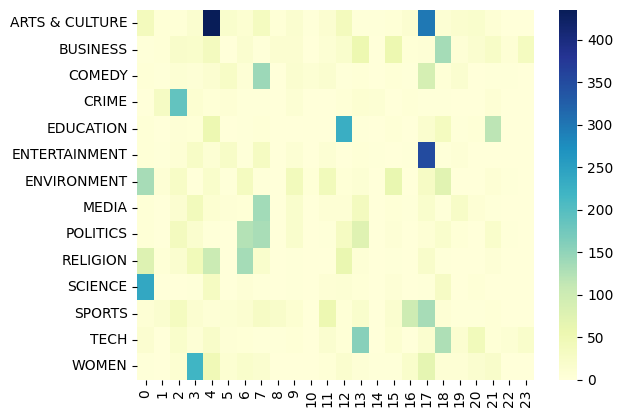

In [129]:
ax = sns.heatmap(count_category_array, cmap='YlGnBu', yticklabels=categories, xticklabels=np.arange(24))